In [1]:
import pandas as pd

import utility

train_set_path = './dataset/train_new_feature.csv'
test_set_path = './dataset/test_new_feature.csv'



In [2]:
X_train, y_train, qid_train, X_test, y_test, qid_test = utility.preprocess_data(pd.read_csv(train_set_path), pd.read_csv(test_set_path), test_label=False)

In [3]:
params = {
    "objective": "lambdarank",
    "metric": "ndcg",
    "n_estimators": 1000,
    "learning_rate": 0.1
}
model = utility.train_lgbm_ranker(X_train, y_train, qid_train.value_counts().sort_index(), params)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.115085 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3233
[LightGBM] [Info] Number of data points in the train set: 4958347, number of used features: 22


In [4]:
utility.predict_and_generate_submission(model, X_test, qid_test, './dataset/submission9.csv')

Processing groups: 100%|██████████| 199549/199549 [08:44<00:00, 380.50it/s]


# Plot feature importance

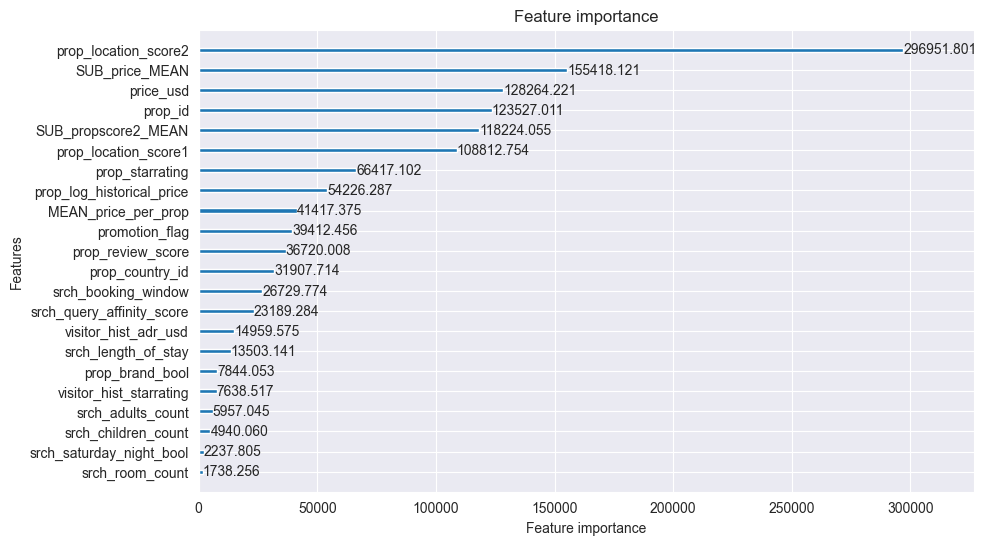

In [5]:
import lightgbm as lgb
import matplotlib.pyplot as plt

# Assuming `model` is your trained LightGBM model
# Change tree_index to the specific tree you want to visualize
lgb.plot_importance(model, importance_type='gain', figsize=(10,6))
plt.savefig('./model1.png', dpi=1200)
